In [1]:
import pandas as pd
from collections import Counter

# Đọc dữ liệu Iris
iris = pd.read_csv('iris.csv')
X = iris.drop(columns=['species']).values.tolist()
y = iris['species'].tolist()

class DecisionTreeClassifierFromScratch:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None
    
    def _gini(self, labels):
        # Tính chỉ số Gini cho tập nhãn
        m = len(labels)
        if m == 0: return 0
        counts = Counter(labels)
        impurity = 1.0
        for count in counts.values():
            p = count / m
            impurity -= p**2
        return impurity
    
    def _best_split(self, X, y):
        best_gain = 0
        best_feat, best_thresh = None, None
        current_impurity = self._gini(y)
        n_features = len(X[0])
        # Duyệt từng thuộc tính để tìm ngưỡng phân chia tốt nhất
        for feature in range(n_features):
            values = sorted(set(x[feature] for x in X))
            for i in range(1, len(values)):
                thresh = (values[i-1] + values[i]) / 2
                left_y = [y[j] for j,x in enumerate(X) if x[feature] <= thresh]
                right_y = [y[j] for j,x in enumerate(X) if x[feature] >  thresh]
                if not left_y or not right_y: 
                    continue
                # Tính Gini con trái và phải
                gini_left = self._gini(left_y)
                gini_right = self._gini(right_y)
                p_left = len(left_y) / len(y)
                gain = current_impurity - (p_left * gini_left + (1 - p_left) * gini_right)
                if gain > best_gain:
                    best_gain, best_feat, best_thresh = gain, feature, thresh
        return best_gain, best_feat, best_thresh
    
    def _build_tree(self, X, y, depth=0):
        # Nếu tất cả nhãn giống nhau hoặc không thể chia thêm, tạo lá
        if len(set(y)) == 1 or depth == self.max_depth or len(y) < self.min_samples_split:
            return {'type': 'leaf', 'class': Counter(y).most_common(1)[0][0]}
        gain, feature, thresh = self._best_split(X, y)
        # Nếu không còn cải thiện, tạo lá
        if gain == 0 or feature is None:
            return {'type': 'leaf', 'class': Counter(y).most_common(1)[0][0]}
        # Chia dữ liệu theo ngưỡng tìm được
        left_X, left_y, right_X, right_y = [], [], [], []
        for xi, yi in zip(X, y):
            if xi[feature] <= thresh:
                left_X.append(xi); left_y.append(yi)
            else:
                right_X.append(xi); right_y.append(yi)
        # Đệ quy xây dựng cây con trái và phải
        left_tree  = self._build_tree(left_X, left_y, depth+1)
        right_tree = self._build_tree(right_X, right_y, depth+1)
        return {'type': 'node', 'feature': feature, 'threshold': thresh,
                'left': left_tree, 'right': right_tree}

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)
    
    def _predict_one(self, xi, node):
        if node['type'] == 'leaf':
            return node['class']
        if xi[node['feature']] <= node['threshold']:
            return self._predict_one(xi, node['left'])
        else:
            return self._predict_one(xi, node['right'])
    
    def predict(self, X):
        return [self._predict_one(xi, self.tree) for xi in X]

# Tạo và đánh giá mô hình cây phân loại
clf = DecisionTreeClassifierFromScratch(max_depth=3)
clf.fit(X, y)
predictions = clf.predict(X)
accuracy = sum(p == t for p, t in zip(predictions, y)) / len(y)
print("Độ chính xác (scratch):", accuracy)

Độ chính xác (scratch): 0.9733333333333334


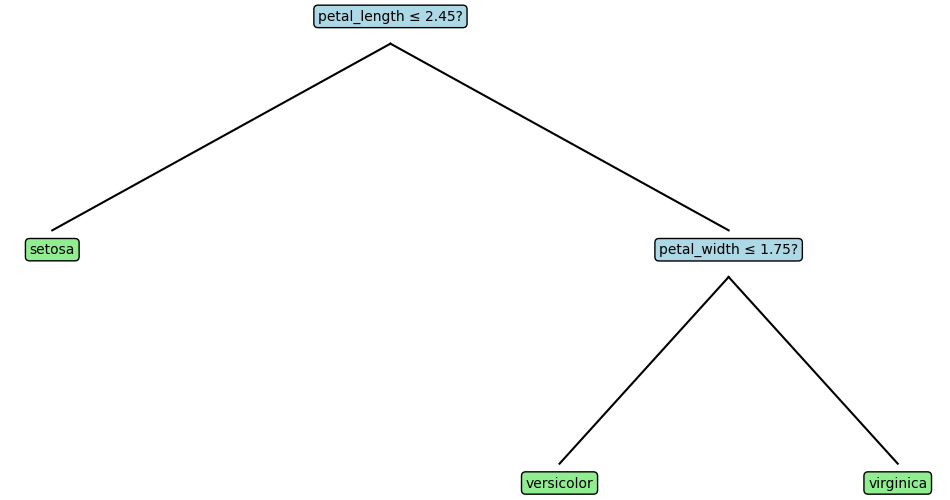

In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# ====== 1. Đọc dữ liệu Iris ======
iris = pd.read_csv('iris.csv')
X = iris.drop(columns=['species']).values.tolist()
y = iris['species'].tolist()

# ====== 2. Cây quyết định viết từ đầu ======
class DecisionTreeClassifierFromScratch:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None
    
    def _gini(self, labels):
        m = len(labels)
        if m == 0: return 0
        counts = Counter(labels)
        impurity = 1.0
        for count in counts.values():
            p = count / m
            impurity -= p**2
        return impurity
    
    def _best_split(self, X, y):
        best_gain = 0
        best_feat, best_thresh = None, None
        current_impurity = self._gini(y)
        n_features = len(X[0])
        for feature in range(n_features):
            values = sorted(set(x[feature] for x in X))
            for i in range(1, len(values)):
                thresh = (values[i-1] + values[i]) / 2
                left_y = [y[j] for j, x in enumerate(X) if x[feature] <= thresh]
                right_y = [y[j] for j, x in enumerate(X) if x[feature] > thresh]
                if not left_y or not right_y:
                    continue
                gini_left = self._gini(left_y)
                gini_right = self._gini(right_y)
                p_left = len(left_y) / len(y)
                gain = current_impurity - (p_left * gini_left + (1 - p_left) * gini_right)
                if gain > best_gain:
                    best_gain, best_feat, best_thresh = gain, feature, thresh
        return best_gain, best_feat, best_thresh
    
    def _build_tree(self, X, y, depth=0):
        if len(set(y)) == 1 or depth == self.max_depth or len(y) < self.min_samples_split:
            return {'type': 'leaf', 'class': Counter(y).most_common(1)[0][0]}
        gain, feature, thresh = self._best_split(X, y)
        if gain == 0 or feature is None:
            return {'type': 'leaf', 'class': Counter(y).most_common(1)[0][0]}
        left_X, left_y, right_X, right_y = [], [], [], []
        for xi, yi in zip(X, y):
            if xi[feature] <= thresh:
                left_X.append(xi); left_y.append(yi)
            else:
                right_X.append(xi); right_y.append(yi)
        left_tree = self._build_tree(left_X, left_y, depth + 1)
        right_tree = self._build_tree(right_X, right_y, depth + 1)
        return {'type': 'node', 'feature': feature, 'threshold': thresh,
                'left': left_tree, 'right': right_tree}

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _predict_one(self, xi, node):
        if node['type'] == 'leaf':
            return node['class']
        if xi[node['feature']] <= node['threshold']:
            return self._predict_one(xi, node['left'])
        else:
            return self._predict_one(xi, node['right'])
    
    def predict(self, X):
        return [self._predict_one(xi, self.tree) for xi in X]

# ====== 3. Huấn luyện mô hình ======
clf = DecisionTreeClassifierFromScratch(max_depth=2)
clf.fit(X, y)

# ====== 4. Hàm vẽ cây ======
def plot_tree_structure(node, feature_names, depth=0, x=0.5, y=1.0, dx=0.25, dy=0.2, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.axis('off')
    if node['type'] == 'leaf':
        ax.text(x, y, node['class'], ha='center', bbox=dict(boxstyle="round", fc="lightgreen"))
    else:
        text = f"{feature_names[node['feature']]} ≤ {node['threshold']:.2f}?"
        ax.text(x, y, text, ha='center', bbox=dict(boxstyle="round", fc="lightblue"))
        ax.plot([x, x - dx], [y - 0.02, y - dy + 0.02], 'k-')
        ax.plot([x, x + dx], [y - 0.02, y - dy + 0.02], 'k-')
        plot_tree_structure(node['left'], feature_names, depth + 1, x - dx, y - dy, dx / 2, dy, ax)
        plot_tree_structure(node['right'], feature_names, depth + 1, x + dx, y - dy, dx / 2, dy, ax)
    if depth == 0:
        plt.show()

# ====== 5. Vẽ cây ======
feature_names = list(iris.drop(columns=['species']).columns)
plot_tree_structure(clf.tree, feature_names)
